<a href="https://colab.research.google.com/github/ekagravarma/pyhton-ml/blob/main/Clusterring_Income_Spent_Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('segmented_customers.csv')
print(dataset.shape)
print(dataset.describe())


Saving segmented_customers.csv to segmented_customers (2).csv
(200, 6)
       CustomerID      Gender  ...  Spending Score (1-100)     cluster
count  200.000000  200.000000  ...              200.000000  200.000000
mean   100.500000    0.440000  ...               50.200000    1.760000
std     57.879185    0.497633  ...               25.823522    1.191427
min      1.000000    0.000000  ...                1.000000    0.000000
25%     50.750000    0.000000  ...               34.750000    1.000000
50%    100.500000    0.000000  ...               50.000000    2.000000
75%    150.250000    1.000000  ...               73.000000    2.000000
max    200.000000    1.000000  ...               99.000000    4.000000

[8 rows x 6 columns]


Label Encoding

In [4]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
dataset['Gender'] =label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


Dendrogram Data Visualization

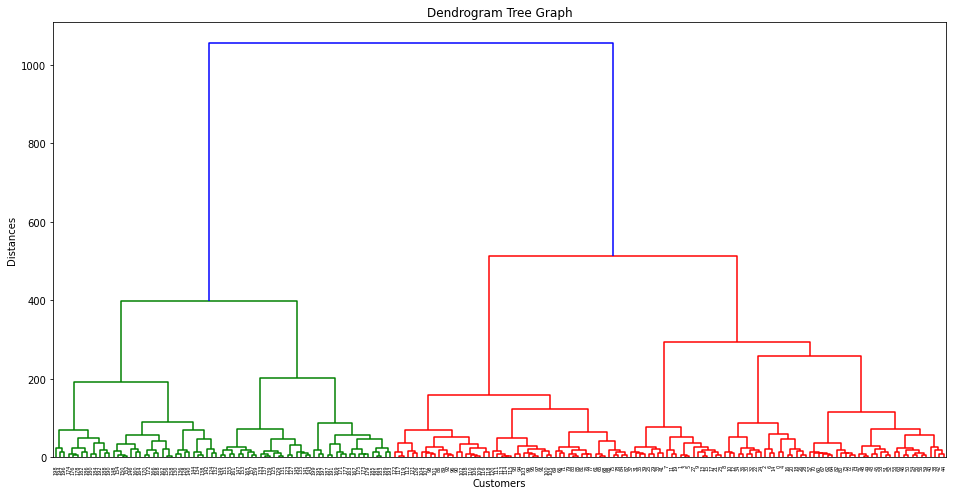

In [5]:
import scipy.cluster.hierarchy as clus
plt.figure(1,figsize=(16,8))
dendrogram= clus.dendrogram(clus.linkage(dataset,method="ward"))
plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()


fitting the hierarchial clusterring to the dataset with n=5

In [10]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_means = model.fit_predict(dataset,0)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

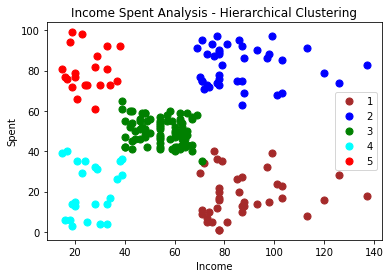

In [13]:
X=dataset.iloc[:,[3,4]].values
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,c='cyan',label='4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50,c='red',label='5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel("Income")
plt.ylabel("Spent")
plt.legend()
plt.show()